In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Option():
    def __init__(self, option):
        self.name = option
        # Set I (initiation set), beta (termination set), pi (policy) 
        self._setIBetaPi()
        
    def pickAction(self, state):
        action_number = self.pi[state]
        if action_number == 1:
            action = "left"
        elif action_number == 2:
            action = "up"
        elif action_number == 3:
            action = "right"
        elif action_number == 4:
            action = "down"
        # Return action number, used for intra-option model learning
        return action, action_number
               
    def visualize(self):
        plt.imshow(self.I)
        plt.colorbar()
        plt.title("Initiation set")
        plt.show()
        plt.imshow(self.beta)
        plt.colorbar()
        plt.title("Termination set")
        plt.show()
        plt.imshow(self.pi)
        plt.colorbar()
        plt.title("Policy")
        plt.show()
        
    def _setIBetaPi(self):
        if self.name in ["left", "up", "right", "down"]:
            self.I = np.ones((13, 13))    # Available everywhere
            self.beta = np.ones((13, 13)) # Terminates everywhere
            
            if self.name == "left":
                self.pi = np.ones((13, 13))     # Left  (1 everywhere)
            elif self.name == "up":
                self.pi = np.ones((13, 13)) + 1 # Up    (2 everywhere)
            elif self.name == "right":
                self.pi = np.ones((13, 13)) + 2 # Right (3 everywhere)
            elif self.name == "down":
                self.pi = np.ones((13, 13)) + 3 # Down  (4 everywhere)
      
        else :
            self.I = np.zeros((13, 13))
            self.beta = np.ones((13, 13))
            self.pi = np.zeros((13, 13))
            
            if self.name == "topleft->topright":
                self.I[1:6, 1:6] = self.I[6, 2] = 1
                self.beta[1:6, 1:6] = 0
                self.pi[1:6, 1:5] = self.pi[3, 5] = 3 # Right
                self.pi[1:3, 5] = 4                   # Down
                self.pi[6, 2] = self.pi[4:6, 5] = 2   # Up

            if self.name == "topleft->botleft":
                self.I[1:6, 1:6] = self.I[3, 6] = 1
                self.beta[1:6, 1:6] = 0
                self.pi[1:5, 1:6] = self.pi[5, 2] = 4 # Down
                self.pi[5, 1] = 3                     # Right
                self.pi[3, 6] = self.pi[5, 3:6] = 1   # Left

            if self.name == "botleft->topleft":
                self.I[7:12, 1:6] = self.I[10, 6] = 1
                self.beta[7:12, 1:6] = 0
                self.pi[8:12, 1:6] = self.pi[7, 2] = 2 # Up
                self.pi[7, 1] = 3                      # Right
                self.pi[7, 3:6] = self.pi[10, 6]  = 1  # Left
            
            if self.name == "botleft->botright":
                self.I[7:12, 1:6] = self.I[6, 2] = 1
                self.beta[7:12, 1:6] = 0
                self.pi[7:12, 1:6] = self.pi[10, 5] = 3 # Right
                self.pi[7:10, 5] = self.pi[6, 2] = 4    # Down
                self.pi[11, 5] = 2                      # Up
                
            if self.name == "topright->topleft":
                self.I[1:7, 7:12] = self.I[7, 9] = 1
                self.beta[1:7, 7:12] = 0
                self.pi[1:7, 8:12] = self.pi[3, 7] = 1 # Left
                self.pi[7, 9] = self.pi[4:7, 7] = 2    # Up
                self.pi[1:3, 7] = 4                    # Down
                
            if self.name == "topright->botright":
                self.I[3, 6] = self.I[1:7, 7:12] = 1
                self.beta[1:7, 7:12] = 0
                self.pi[1:6, 7:12] = self.pi[6, 9] = 4 # Down
                self.pi[3, 6] = self.pi[6, 7:9] = 3    # Right
                self.pi[6, 10:12] = 1                  # Left
            
            if self.name == "botright->botleft":
                self.I[8:12, 7:12] = self.I[7, 9] = 1
                self.beta[8:12, 7:12] = 0
                self.pi[8:12, 8:12] = self.pi[10, 7] = 1 # Left
                self.pi[7, 9] = self.pi[8:10, 7] = 4     # Down
                self.pi[11, 7] = 2                       # Up
                
            if self.name == "botright->topright":
                self.I[8:12, 7:12] = self.I[10, 6] = 1
                self.beta[8:12, 7:12] = 0
                self.pi[9:12, 7:12] = self.pi[8, 9] = 2  # Up
                self.pi[10, 6] = self.pi[8, 7:9] = 3     # Right
                self.pi[8, 10:12] = 1                    # Left
        
    def __str__(self):
        return self.name

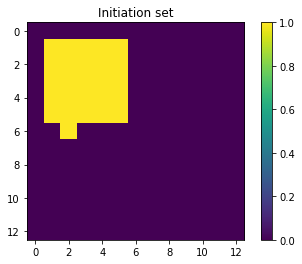

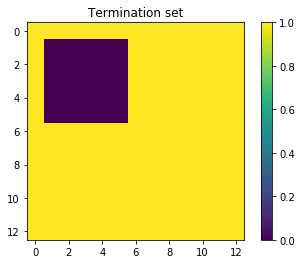

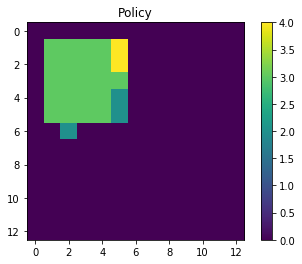

In [3]:
o = Option("topleft->topright")
o.visualize()